# Distribution plot

## Setting up the plotly library

In [1]:
# Importing high-level chart objects
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'

# Importing the figure factory
import plotly.figure_factory as ff

# This should not be used for new installations !!!
from plotly.offline import iplot 

## Creating data point values

In [2]:
# Import the random module
import random

# Import the numerical python library
import numpy as np

# Seed the pseudo-random generator
np.random.seed(1234)

age = np.random.uniform(low = 21, high = 75, size = 1000)
salary = np.random.normal(loc = 3000, scale = 1000, size = 1000)
binary_gender = random.choices(["female", "male"], k = 1000);

# Import pandas
import pandas as pd

# Create dataframe
df = pd.DataFrame({"Age":age, "Salary":salary, "Gender":binary_gender})

# Gender-based sub-dataframes
female = df[df.Gender == "female"]
male = df[df.Gender == "male"]

In [3]:
# First five rows of female sub-dataframe
female.head()

,Age,Salary,Gender
0,31.342050,3685.561585,female
2,44.637298,4381.287767,female
3,63.409364,3068.426559,female
4,63.118694,3312.536292,female
6,35.929070,2211.528125,female


In [4]:
# last five rows of male sub-dataframe
male.tail()

,Age,Salary,Gender
993,39.492382,2584.065692,male
994,40.192355,3248.672450,male
995,74.775265,3407.734302,male
997,28.081782,3674.282061,male
999,46.771250,3698.200207,male


## Bare-bones distribution plot

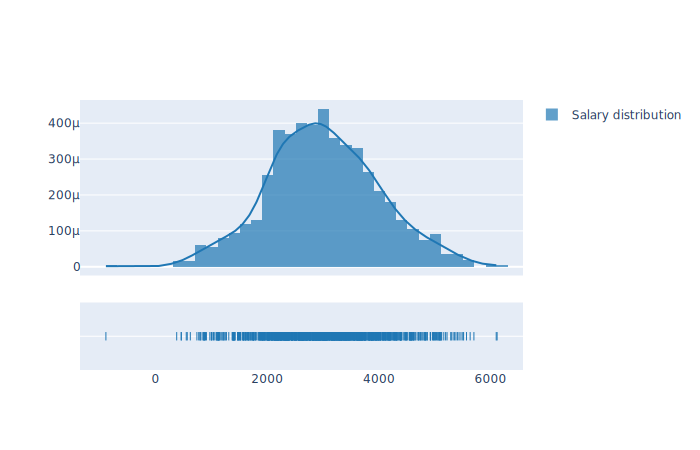

In [5]:
fig = ff.create_distplot(hist_data = [df.Salary.values.tolist()],
                         group_labels = ["Salary distribution"],
                        bin_size = [200])

pio.show(fig, 'svg')

## Adding a title

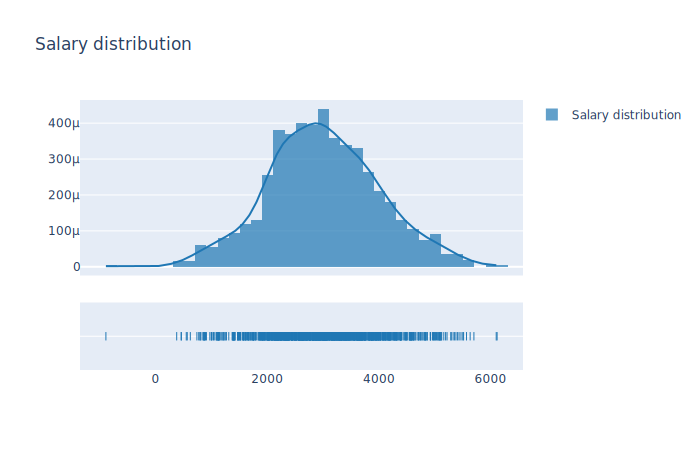

In [6]:
fig = ff.create_distplot(hist_data = [df.Salary.values.tolist()],
                         group_labels = ["Salary distribution"],
                        bin_size = [200])

fig["layout"].update(title = "Salary distribution")

# iplot(fig)
pio.show(fig, 'svg')

## Distribution plot of two datasets

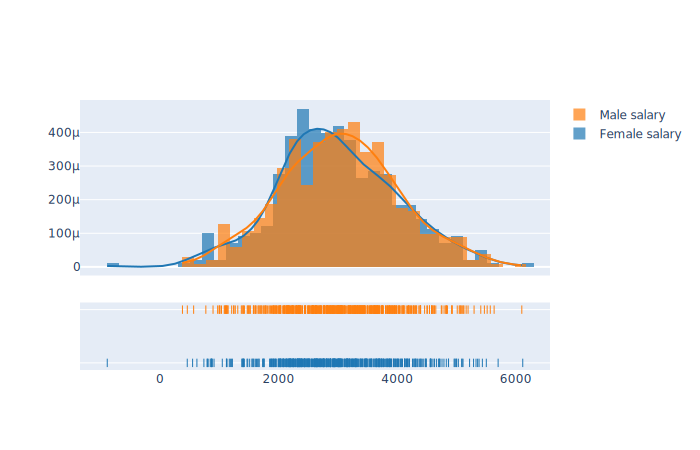

In [7]:
hist_data = [female.Salary.values.tolist(), male.Salary.values.tolist()]
group_labels = ["Female salary", "Male salary"]

fig = ff.create_distplot(hist_data, group_labels,
                        bin_size = [200, 200])

# iplot(fig)
pio.show(fig, renderer='svg')

## Changing colors

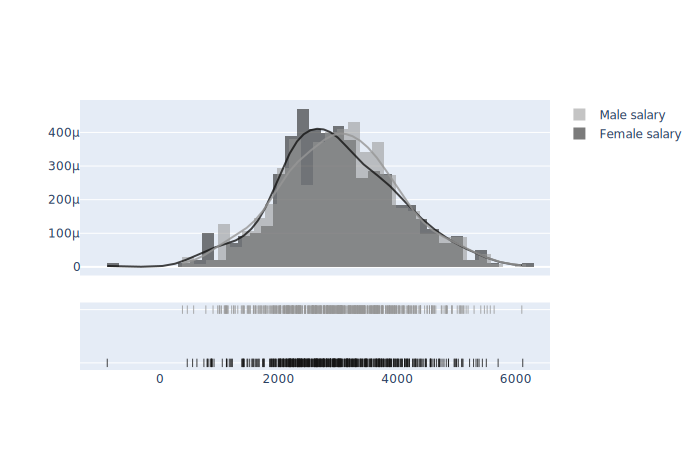

In [8]:
hist_data = [female.Salary.values.tolist(), male.Salary.values.tolist()]
group_labels = ["Female salary", "Male salary"]

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size = [200, 200],
                         colors = ["rgba(20,20,20,0.8)", "rgba(150,150,150,0.8)"])

# iplot(fig)
pio.show(fig, renderer='svg')

## Normal curve

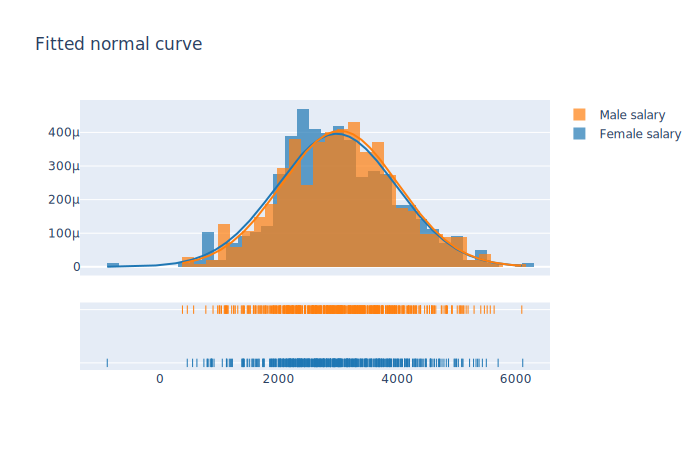

In [9]:
hist_data = [female.Salary.values.tolist(), male.Salary.values.tolist()]
group_labels = ["Female salary", "Male salary"]

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size = [200, 200],
                        curve_type = "normal")

fig.layout.update({"title":"Fitted normal curve"})

# iplot(fig)
pio.show(fig, renderer='svg')

## Omit the histogram and rug plot

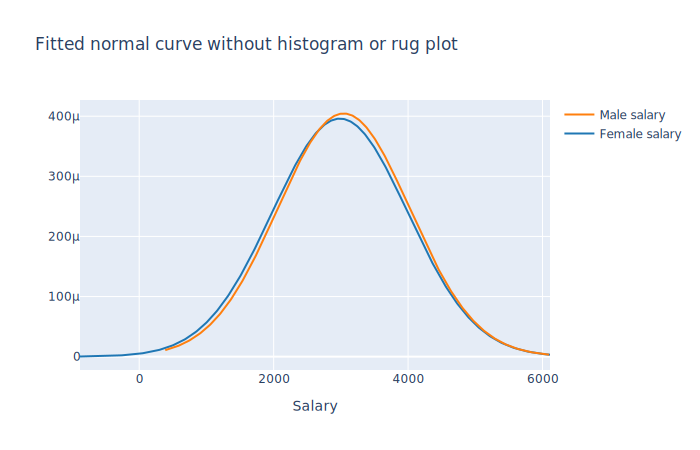

In [10]:
hist_data = [female.Salary.values.tolist(), male.Salary.values.tolist()]
group_labels = ["Female salary", "Male salary"]

fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size = [200, 200],
                         curve_type = "normal",
                        show_hist = False,
                        show_rug = False)

fig.layout.update({"title":"Fitted normal curve without histogram or rug plot",
                  "xaxis":{"title":"Salary", "domain":[0,1]}})

# iplot(fig)
pio.show(fig, renderer='svg')